In [1]:
import os
import pandas as pd
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

# fix type3 fonts
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
activities = ["idle", "web", "onion"]
radios = ["4g", "wifi"]
networks = ["direct", "nopad", "redpad", "fullpad"]

TIME_CUTOFF = 10*60

experiments = [
    (activity, radio, network)
    for activity in activities
    for radio in radios
    for network in networks
]

def humanify(name):
    try:
        return {
            "idle": "Idle",
            "web": "Web (.com)",
            "onion": "Web (.onion)",
            "4g": "4G", 
            "wifi": "WiFi",
            "direct": "Direct",
            "nopad": "Tor w/o Padding",
            "redpad": "Tor w/ Red. Padding",
            "fullpad": "Tor w/ Full Padding",
        }[name]
    except KeyError:
        return name

# Read from all experiments
dfs = []
for (activity, radio, network) in experiments:
    fn = f"tor_{radio}_{activity}_{network}.csv"
    if not os.path.exists(f"../measurements/{fn}"):
        continue
    
    df = pd.read_csv(f"../measurements/{fn}", usecols=["time_s", "power_mw"]) 
    
    df["experiment"] = f"{radio}_{activity}_{network}"
    df["activity"] = humanify(activity)
    df["network"] = humanify(network)
    df["radio"] = humanify(radio)
    
    df["power_mw"] = df["power_mw"].rolling(10).mean()
    
    df = df[df.time_s <= TIME_CUTOFF]
    print(f"{fn}: {len(df)} rows")
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)
del dfs

activities = [humanify(x) for x in activities]
networks = [humanify(x) for x in networks]
radios = [humanify(x) for x in radios]

print(f"Total read {len(df)} rows")

tor_wifi_idle_direct.csv: 1501102 rows
tor_wifi_idle_fullpad.csv: 1502167 rows
tor_wifi_web_direct.csv: 1263138 rows
tor_wifi_web_fullpad.csv: 1501568 rows
Total read 5767975 rows


In [3]:
battery_capacity = 8000 # mWh
df["hourly_percentage"] = df["power_mw"].apply(lambda x: 100.0 / (battery_capacity/x))

/tmp/ipykernel_1164290/1019179607.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99)` for the same effect.

  g = sns.catplot(


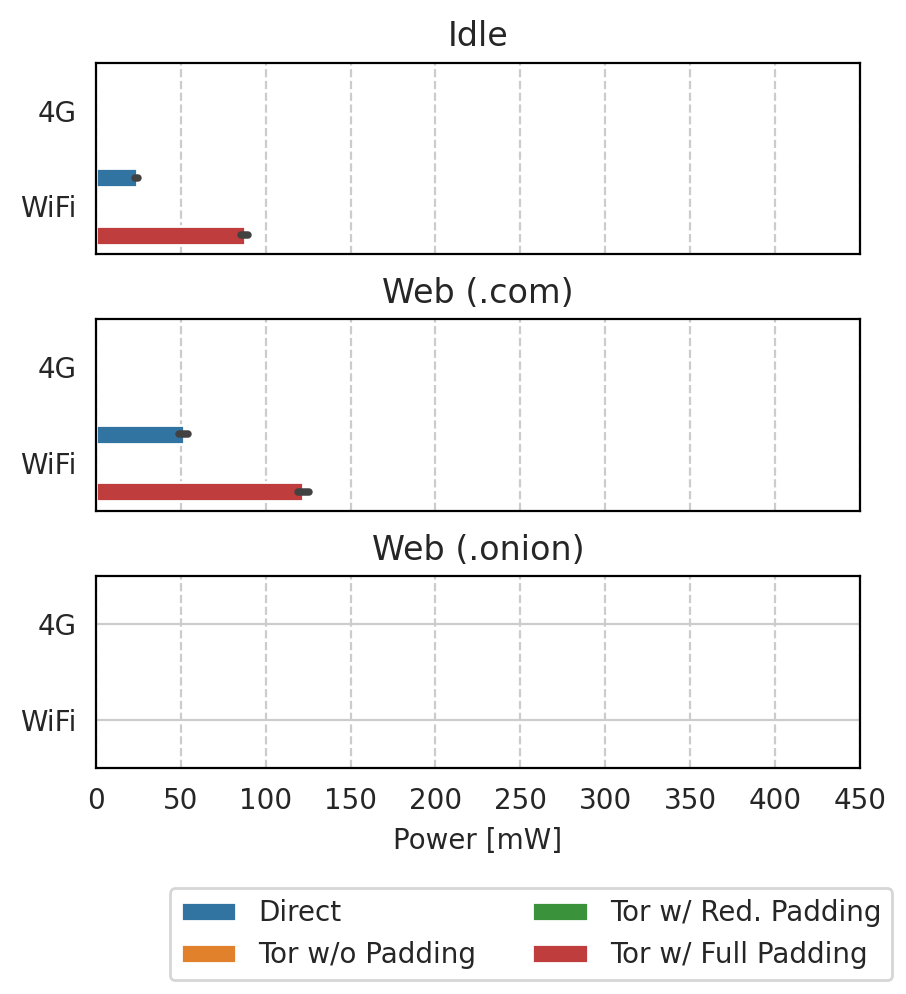

In [4]:
sns.set_style("whitegrid")

g = sns.catplot(
    data=df.sample(100_000), x="power_mw",
    row="activity", row_order=activities,
    y="radio", order=radios,
    hue="network", hue_order=networks,
    orient="h",
    kind="bar", ci=99,
    legend=False,
)

g.set_axis_labels("Power [mW]", "")
g.set(xlim=(0, None))

g.fig.set_figwidth(4.5)
g.fig.set_figheight(5.0)

for row, ax in g.axes_dict.items():
    sns.despine(ax=ax, top=False, right=False)
    ax.set_title(row)
    [s.set_color("black") for s in ax.spines.values()]
    ax.grid(True, "major", "x", ls="--")
    ax.set_xlim((0, 450))
    
g.tight_layout()
g.fig.legend(handles=g._legend_data.values(), labels=g._legend_data.keys(), loc="lower right", ncol=2)
g.fig.subplots_adjust(bottom=0.22)

g.savefig("output/tor_boxplot_new.pdf", bbox_inches='tight', pad_inches=0.01)

In [5]:
dfs = df.sample(100_000)

for a in activities:
    print("\\multicolumn{4}{c}{\\textit{"+a+"}}\\\\")
    print(f"\\midrule")
    for r in radios:
        for n in networks:
            d = dfs[(dfs.radio==r) & (dfs.activity==a) & (dfs.network==n)]
            p = d.power_mw.mean()
            hp = d.hourly_percentage.mean()
            n = n.replace("_", "\\_")
            print(f"{r} & {n} & {p:.1f} & {hp:.1f}\\% \\\\ ")
        print(f"\\midrule")

\multicolumn{4}{c}{\textit{Idle}}\\
\midrule
4G & Direct & nan & nan\% \\ 
4G & Tor w/o Padding & nan & nan\% \\ 
4G & Tor w/ Red. Padding & nan & nan\% \\ 
4G & Tor w/ Full Padding & nan & nan\% \\ 
\midrule
WiFi & Direct & 23.4 & 0.3\% \\ 
WiFi & Tor w/o Padding & nan & nan\% \\ 
WiFi & Tor w/ Red. Padding & nan & nan\% \\ 
WiFi & Tor w/ Full Padding & 87.3 & 1.1\% \\ 
\midrule
\multicolumn{4}{c}{\textit{Web (.com)}}\\
\midrule
4G & Direct & nan & nan\% \\ 
4G & Tor w/o Padding & nan & nan\% \\ 
4G & Tor w/ Red. Padding & nan & nan\% \\ 
4G & Tor w/ Full Padding & nan & nan\% \\ 
\midrule
WiFi & Direct & 52.0 & 0.6\% \\ 
WiFi & Tor w/o Padding & nan & nan\% \\ 
WiFi & Tor w/ Red. Padding & nan & nan\% \\ 
WiFi & Tor w/ Full Padding & 122.9 & 1.5\% \\ 
\midrule
\multicolumn{4}{c}{\textit{Web (.onion)}}\\
\midrule
4G & Direct & nan & nan\% \\ 
4G & Tor w/o Padding & nan & nan\% \\ 
4G & Tor w/ Red. Padding & nan & nan\% \\ 
4G & Tor w/ Full Padding & nan & nan\% \\ 
\midrule
WiFi & Dir